In [55]:
import requests
import pandas as pd
import geopandas as gpd
import rasterio
from matplotlib import pyplot

 - another exploration on gpm, api

In [29]:
r = requests.get("https://pmmpublisher.pps.eosdis.nasa.gov/opensearch?q=precip_1d&lat=30&lon=78&limit=2&startTime=2021-07-10&endTime=2021-07-12")

In [114]:
url = "https://pmmpublisher.pps.eosdis.nasa.gov/opensearch?q=precip_30mn&lat=30&lon=78&limit=10&startTime=2021-07-10%2018%3A59%3A59&endTime=2021-07-12%2021%3A59%3A59"
r = requests.get(url)

In [104]:
r

<Response [200]>

In [ ]:
items = r.json()['items']
items

In [135]:
turl = None
for i in items:
    mediaType = i['action'][1]['using'][1]['mediaType']
    if mediaType == 'image/tiff':
        print(i['properties']['date']['@value'])
    else:
        print(i['action'][1]['using'][2]['url'])
    #turl = i['action'][0]['using'][0]['url']


https://pmmpublisher.pps.eosdis.nasa.gov/products/s3/r07/gpm_30mn/2021/193/gpm_30mn.20210712.235959.tif
2021-07-12T23:29:59+00:00
2021-07-12T22:59:59+00:00
2021-07-12T22:29:59+00:00
2021-07-12T21:59:59+00:00
2021-07-12T21:29:59+00:00
2021-07-12T20:59:59+00:00
2021-07-12T20:29:59+00:00
2021-07-12T19:59:59+00:00
2021-07-12T19:29:59+00:00


In [136]:
len(items)

10

In [17]:
df = gpd.read_file('https://pmmpublisher.pps.eosdis.nasa.gov/products/gpm_30mn/export/r07/2021/193/gpm_30mn.20210712.235959.geojson')

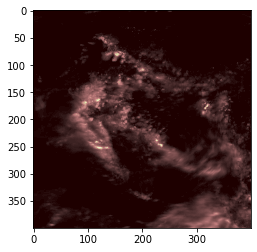

In [56]:
src = rasterio.open('https://pmmpublisher.pps.eosdis.nasa.gov/products/s3/r07/gpm_1d/2021/192/gpm_1d.20210711.tif')
pyplot.imshow(src.read(1), cmap='pink')
pyplot.show()

In [59]:
src.crs

CRS.from_epsg(4326)

In [64]:
src.bounds

BoundingBox(left=60.0, bottom=0.0, right=100.0, top=40.0)

In [68]:
src.transform * (350,350)

(95.0, 5.0)

In [71]:
src.index(70,30)

(100, 100)

In [74]:
src.read(1)[200, 100]

293

In [61]:
src.read(1).size

160000

In [63]:
src.read(1)[50, 150]

26

In [18]:
df

,precip,geometry
0,1,"POLYGON ((71.24912 39.94790, 71.24912 39.97590..."
1,1,"POLYGON ((70.06101 39.54795, 70.06101 39.59194..."
2,1,"POLYGON ((84.45845 39.50395, 84.45845 39.59194..."
3,1,"POLYGON ((84.85449 39.44796, 84.85449 39.49195..."
4,1,"POLYGON ((81.43414 39.24798, 81.43414 39.29197..."
...,...,...
491,10,"POLYGON ((84.91049 14.74249, 84.91049 14.77848..."
492,10,"POLYGON ((85.53855 14.14655, 85.53855 14.17055..."
493,20,"POLYGON ((67.24072 21.88576, 67.24072 21.94175..."
494,20,"POLYGON ((70.03700 20.74987, 70.06501 20.76987..."


In [1]:
from sympy import Point, Polygon

In [8]:
poly1 = df.head(0)['geometry']

In [75]:
road = gpd.read_file('54-20210712.shp')

DriverError: 54-20210712.shp: No such file or directory